# Imports

Here we import the required libraries

In [112]:
!pip install torchsummary

In [113]:

from google.colab import drive
import os
import pandas as pd

# Montar Google Drive en Colab
drive.mount('/content/drive')


# Ruta a las carpetas en Google Drive
ruta_pet ='/content/drive/MyDrive/ecobot nuevo/PrimerDATASET ecobot-20231117T022901Z-001/PrimerDATASET ecobot/EMPTY'
ruta_empty ='/content/drive/MyDrive/ecobot nuevo/PrimerDATASET ecobot-20231117T022901Z-001/PrimerDATASET ecobot/PET'


# Listar archivos en las carpetas
archivos_pet = os.listdir(ruta_pet)
archivos_empty = os.listdir(ruta_empty)

# Crear listas para almacenar nombres de archivos y nombres de carpetas
nombres_archivos = []
nombres_carpetas = []

# Procesar archivos en la carpeta PET
for archivo_pet in archivos_pet:
    nombres_archivos.append(archivo_pet)
    nombres_carpetas.append('PET')

# Procesar archivos en la carpeta EMPTY
for archivo_empty in archivos_empty:
    nombres_archivos.append(archivo_empty)
    nombres_carpetas.append('EMPTY')

# Crear un DataFrame con los datos
data = {'Archivo': nombres_archivos, 'Carpeta': nombres_carpetas}
df = pd.DataFrame(data)

# Visualizar el DataFrame
print(df.head())

# Guardar el DataFrame como un archivo CSV en tu Google Drive
##df.to_csv('/content/drive/MyDrive/dataset.csv', index=False)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
          Archivo Carpeta
0  frame_0909.jpg     PET
1  frame_0926.jpg     PET
2  frame_0925.jpg     PET
3  frame_0933.jpg     PET
4  frame_0928.jpg     PET


In [114]:
  df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 963 entries, 0 to 962
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Archivo  963 non-null    object
 1   Carpeta  963 non-null    object
dtypes: object(2)
memory usage: 15.2+ KB


In [115]:
len(df["Archivo"].unique())

963

In [116]:
pip install wandb

In [117]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
from __future__ import print_function, division

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from numpy.typing import NDArray
from functools import reduce
from itertools import islice
import wandb
import math
from itertools import chain
import copy

import torch
from torch import nn
from torch import Tensor
from torch.optim import Optimizer
import torch.nn.functional as F
import torchvision
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
from torchsummary import summary
# Import albumentations library in order to -use pre-built augmentations
import albumentations as A

from sklearn.model_selection import train_test_split
from multiprocessing import cpu_count

import os
import torch
import os.path as osp
from skimage import io, transform
import matplotlib.pyplot as plt
import typing as ty
import cv2

plt.ion()   # interactive mode

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

#for root, dirs, filenames in os.walk('/kaggle/input'):
#    for i, filepath in enumerate(filenames):
 #       if i >= 10:
  #          print()
   #         break
   #     print(osp.join(root, filepath))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## Creating dataset structure

In [118]:
torch.manual_seed(32)
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'Using {device}')
test = torch.ones((100, 100)).to(device)
del test
torch.cuda.empty_cache()

Using cuda


In [ ]:
  import os

# Ruta a la carpeta en Google Drive
drive_folder_path = '/content/drive/MyDrive/ecobot nuevo/PrimerDATASET ecobot-20231117T022901Z-001/PrimerDATASET ecobot/EMPTY'
os.chdir(drive_folder_path)

import cv2

# Lista de archivos en la carpeta
image_files = os.listdir(drive_folder_path)

# Selecciona una imagen de muestra (puedes cambiar el índice según tus necesidades)
sample_image_path = os.path.join(drive_folder_path, image_files[0])

# Lee la imagen de muestra
sample_image = cv2.imread(sample_image_path)

# Obtiene las dimensiones de la imagen de muestra
h, w, c = sample_image.shape

print(f"Dimensiones de la imagen de muestra: Alto={h}, Ancho={w}, Canales={c}")






Dimensiones de la imagen de muestra: Alto=1080, Ancho=1920, Canales=3


In [ ]:
import os

# Ruta a la carpeta en Google Drive
drive_folder_path = '/content/drive/MyDrive/ecobot nuevo/PrimerDATASET ecobot-20231117T022901Z-001/PrimerDATASET ecobot/PET'
os.chdir(drive_folder_path)

import cv2

# Lista de archivos en la carpeta
image_files = os.listdir(drive_folder_path)

# Selecciona una imagen de muestra (puedes cambiar el índice según tus necesidades)
sample_image_path = os.path.join(drive_folder_path, image_files[0])

# Lee la imagen de muestra
sample_image = cv2.imread(sample_image_path)

# Obtiene las dimensiones de la imagen de muestra
h, w, c = sample_image.shape

print(f"Dimensiones de la imagen de muestra: Alto={h}, Ancho={w}, Canales={c}")




Dimensiones de la imagen de muestra: Alto=1080, Ancho=1920, Canales=3


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 963 entries, 0 to 962
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  963 non-null    object
 1   class     963 non-null    object
dtypes: object(2)
memory usage: 15.2+ KB


In [119]:
df = df.rename(columns={'Archivo': 'filename'})

# Renombrar la columna 'Carpeta' a 'class'
df = df.rename(columns={'Carpeta': 'class'})

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 963 entries, 0 to 962
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  963 non-null    object
 1   class     963 non-null    object
dtypes: object(2)
memory usage: 15.2+ KB


In [121]:
obj2id = {
    "EMPTY": 0,
    "PET": 1
}

id2obj = {
    0: "EMPTY",
    1: "PET"
}


In [122]:
df["class_id"]=df["class"].map(obj2id )

In [123]:

train_df= df.sample(frac=0.8, random_state=42)

In [124]:

train_df.shape

(770, 3)

In [125]:
val_df=train_df.sample(frac=0.2, random_state=42)

In [126]:
lista = train_df["filename"]
mask = ~df['filename'].isin(lista)
test= df[mask]

In [127]:
test["class"].value_counts()

PET      103
EMPTY     90
Name: class, dtype: int64

This is done in order to control randomness.

In [128]:
classes = df["class"].unique()
classes

array(['PET', 'EMPTY'], dtype=object)

The training set contians information about the class at each image and the corresponding bounding box.

In [129]:
df.shape

(963, 3)

In [130]:
df.head()

,filename,class,class_id
0,frame_0909.jpg,PET,1
1,frame_0926.jpg,PET,1
2,frame_0925.jpg,PET,1
3,frame_0933.jpg,PET,1
4,frame_0928.jpg,PET,1


In [131]:
test.head()

,filename,class,class_id
1,frame_0926.jpg,PET,1
4,frame_0928.jpg,PET,1
13,frame_0923.jpg,PET,1
14,frame_0922.jpg,PET,1
20,frame_0884.jpg,PET,1


In [132]:
train_df['class'].value_counts(1) * 100

PET      52.337662
EMPTY    47.662338
Name: class, dtype: float64

In [133]:
val_df['class'].value_counts(1) * 100

PET      50.0
EMPTY    50.0
Name: class, dtype: float64

But the test set only contains the filename of each image, so we have to generate predictions and send it to the Kaggle competition.

In [134]:
transform_func_inp_signature = ty.Dict[str, NDArray[np.float_]]
transform_func_signature = ty.Callable[
    [transform_func_inp_signature],
    transform_func_inp_signature
]

class PetsDataset(Dataset):
    """
    Location Pets dataset
    """
    def __init__(
        self,
        df: pd.DataFrame,
        root_dir: str,
        labeled: bool = True,
        transform: ty.Optional[ty.List[transform_func_signature]] = None
    ) -> None:
        self.df = df
        self.root_dir = root_dir
        self.transform = transform
        self.labeled = labeled

    def __len__(self):
        return self.df.shape[0]

    def __getitem__(self, idx: int) -> transform_func_signature:
        if torch.is_tensor(idx):
            idx = idx.tolist()

        # Read image
        img_name = os.path.join(self.root_dir, self.df.filename.iloc[idx])
        image = io.imread(img_name)

        # Convert from BGR to RGB
        #image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

        sample = {'image': image}

        if self.labeled:
            # Read labels
            img_class = self.df.class_id.iloc[idx]
            #name_class = self.df['class'].iloc[idx]
           ## img_bbox = self.df.iloc[idx, 2:6]

           ## img_bbox = np.array([img_bbox]).astype('float')
            img_class = np.array([img_class]).astype('int')
            sample.update({'class_id': img_class})#,'name_class':name_class

        if self.transform:
            sample = self.transform(sample)

        return sample

In [135]:
import os
import shutil

# Ruta base
base_folder = '/content/drive/MyDrive/ecobot nuevo/PrimerDATASET ecobot-20231117T022901Z-001/PrimerDATASET ecobot'

# Carpeta donde se guardarán todas las imágenes
output_folder = os.path.join(base_folder, 'total')

# Crear la carpeta "total" si no existe
os.makedirs(output_folder, exist_ok=True)

# Carpetas que deseas incluir
folders_to_include = ['PET', 'EMPTY']

# Iterar sobre las carpetas y enumerar los archivos
for folder in folders_to_include:
    folder_path = os.path.join(base_folder, folder)

    # Verificar que la carpeta existe
    if os.path.exists(folder_path):
        # Obtener la lista de archivos en la carpeta
        files = os.listdir(folder_path)

        # Crear las rutas completas de las imágenes y copiarlas a la carpeta "total"
        for file in files:
            source_path = os.path.join(folder_path, file)
            destination_path = os.path.join(output_folder, file)
            shutil.copy2(source_path, destination_path)

# Imprimir mensaje cuando se complete la copia
print(f"Imágenes copiadas a la carpeta {output_folder}")


Imágenes copiadas a la carpeta /content/drive/MyDrive/ecobot nuevo/PrimerDATASET ecobot-20231117T022901Z-001/PrimerDATASET ecobot/total


In [ ]:
def draw_classes(imgs, classes, colors, origin, offset: int=5, prefix: str =''):
    result_imgs = imgs.copy()  # Crear una copia para no modificar el tensor original
    for i, (class_id, color) in enumerate(zip(classes, colors)):
        if type(class_id) == list:
            name_class_ = id2obj[class_id[0]]
        else:
            name_class_ = id2obj[class_id]

        # Convertir la imagen a uint8 si no lo es
        img = (result_imgs[i] * 255).astype(np.uint8)

        # Dibujar el nombre de la clase en la imagen
        result_imgs[i] = cv2.putText(
            img, f'{prefix}{name_class_}',
            origin, cv2.FONT_HERSHEY_SIMPLEX,
            0.4, color, 1, cv2.LINE_AA
        ) / 255.0  # Volver a escala 0-1 si es necesario

    return result_imgs

In [ ]:
origin = (10, 20)
colors = [(0, 255, 0), (255, 0, 0), (0, 0, 255)]


In [ ]:
def draw_classes(imgs, classes, colors, origin, offset: int=5, prefix: str =''):
    result_imgs = imgs.copy()  # Crear una copia para no modificar el tensor original
    for i, (class_id, color) in enumerate(zip(classes, colors)):
        if isinstance(class_id, np.ndarray):
            class_id_str = str(class_id)
        else:
            class_id_str = class_id

        if type(class_id_str) == list:
            name_class_ = id2obj[class_id_str[0]]
        else:
            name_class_ = id2obj[class_id_str] if class_id_str in id2obj else f'Unknown:{class_id_str}'

        # Convertir la imagen a uint8 si no lo es
        img = (result_imgs[i] * 255).astype(np.uint8)

        # Dibujar el nombre de la clase en la imagen
        result_imgs[i] = cv2.putText(
            img, f'{prefix}{name_class_}',
            origin, cv2.FONT_HERSHEY_SIMPLEX,
            0.4, color, 1, cv2.LINE_AA
        ) / 255.0  # Volver a escala 0-1 si es necesario

    return result_imgs



In [136]:
train_root_dir = '/content/drive/MyDrive/ecobot nuevo/PrimerDATASET ecobot-20231117T022901Z-001/PrimerDATASET ecobot/total'


In [ ]:
train_root_dir = '/content/drive/MyDrive/ecobot nuevo/PrimerDATASET ecobot-20231117T022901Z-001/PrimerDATASET ecobot/total'
train_ds = PetsDataset(train_df, root_dir=train_root_dir)

num_imgs = 6
start_idx = 0

samples = [train_ds[i] for i in range(start_idx, num_imgs)]

imgs = [s['image'] for s in samples]
#bboxes = [normalize_bbox(s['bbox'].squeeze()) for s in samples]
classes = [s['class_id'] for s in samples]


In [67]:
media = np.mean(imgs)
desviacion_estandar = np.std(imgs)

NameError: ignored

In [ ]:
media

117.11077297132202

In [ ]:
desviacion_estandar

49.61340953478118

In [ ]:
import numpy as np

# Supongamos que 'imgs' es tu tensor NumPy con forma (n, height, width, 3)
# donde 3 son los canales RGB.

# Calcular la media y la desviación estándar para cada canal
media_por_canal = np.mean(imgs, axis=(0, 1, 2))  # axis=(0, 1, 2) indica los ejes de las imágenes
desviacion_estandar_por_canal = np.std(imgs, axis=(0, 1, 2))

print(f'Media por canal: {media_por_canal}')
print(f'Desviación estándar por canal: {desviacion_estandar_por_canal}')


Media por canal: [119.34284835 114.3625254  117.62694517]
Desviación estándar por canal: [50.92391861 49.55108161 48.19869898]


In [ ]:
imgs = draw_classes(imgs, classes, colors, origin)


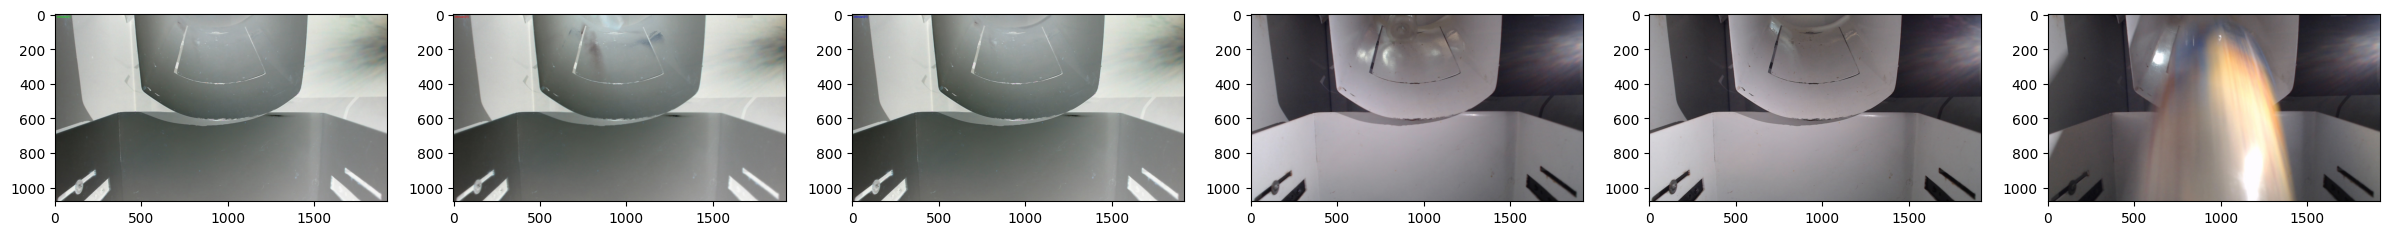

In [ ]:

imgs = draw_classes(imgs, classes, colors, origin)

fig = plt.figure(figsize=(30, num_imgs))

for i, img in enumerate(imgs):
    fig.add_subplot(1, num_imgs, i+1)
    plt.imshow(img)

plt.show()

In [ ]:
samples[2]['class_id']

NameError: ignored

In [ ]:
samples[2]['image']

array([[[156, 154, 159],
        [155, 153, 158],
        [154, 152, 155],
        ...,
        [ 77,  78,  99],
        [ 77,  78,  99],
        [ 79,  80, 101]],

       [[155, 153, 158],
        [154, 152, 157],
        [153, 151, 154],
        ...,
        [ 77,  78,  99],
        [ 77,  78,  99],
        [ 80,  81, 102]],

       [[154, 152, 157],
        [153, 151, 156],
        [152, 150, 155],
        ...,
        [ 78,  76, 100],
        [ 78,  76, 100],
        [ 80,  78, 102]],

       ...,

       [[192, 191, 197],
        [192, 191, 197],
        [192, 191, 197],
        ...,
        [113, 114, 116],
        [113, 114, 116],
        [113, 114, 116]],

       [[192, 191, 197],
        [192, 191, 197],
        [192, 191, 197],
        ...,
        [113, 114, 116],
        [113, 114, 116],
        [113, 114, 116]],

       [[192, 191, 197],
        [192, 191, 197],
        [192, 191, 197],
        ...,
        [113, 114, 116],
        [113, 114, 116],
        [113, 114, 116]]

# Transfer learning

In our case, we are interested in getting a pretrained-model to use it as a backbone that has been trained in other tasks. For example, if we want to use vgg16 as our backbone, we would not need the last classification module and keep the averaged pool module as the source of features to perform both tasks

In [157]:
from torchvision.models import vgg16


class FeatureExtractor(nn.Module):
    def __init__(self, model):
        super(FeatureExtractor, self).__init__()
        # Extract VGG-16 Feature Layers
        self.features = list(model.features)
        self.features = nn.Sequential(*self.features)
        # Extract VGG-16 Average Pooling Layer
        self.pooling = model.avgpool
        # Convert the image into one-dimensional vector
        self.flatten = nn.Flatten()
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        # It will take the input 'x' until it returns the feature vector called 'out'
        out = self.features(x)
        out = self.pooling(out)
        out = self.flatten(out)
        out = self.dropout(out)
        return out

# Load the vgg16 model
vgg16_model = vgg16(pretrained=True, progress=True)
pretrained_model = FeatureExtractor(vgg16_model).to(device)
pretrained_model

FeatureExtractor(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=

In [ ]:
from torchvision.models import mobilenet_v2

class FeatureExtractorMobileNet(nn.Module):
    def __init__(self, model):
        super(FeatureExtractorMobileNet, self).__init__()
        # Extract MobileNetV2 Feature Layers
        self.features = model.features
        # Convert the image into one-dimensional vector
        self.flatten = nn.Flatten()
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        # It will take the input 'x' until it returns the feature vector called 'out'
        out = self.features(x)
        out = self.flatten(out)
        out = self.dropout(out)
        return out

# Load the MobileNetV2 model
mobilenet_model = mobilenet_v2(pretrained=True, progress=True)
pretrained_model = FeatureExtractorMobileNet(mobilenet_model).to(device)
pretrained_model


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V2_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/mobilenet_v2-b0353104.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v2-b0353104.pth
100%|██████████| 13.6M/13.6M [00:00<00:00, 66.3MB/s]


FeatureExtractorMobileNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(inplace=True)
    )
    (1): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU6(inplace=True)
        )
        (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (2): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchN

In [ ]:
summary(pretrained_model, (3, 256, 256))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 256, 256]           1,792
              ReLU-2         [-1, 64, 256, 256]               0
            Conv2d-3         [-1, 64, 256, 256]          36,928
              ReLU-4         [-1, 64, 256, 256]               0
         MaxPool2d-5         [-1, 64, 128, 128]               0
            Conv2d-6        [-1, 128, 128, 128]          73,856
              ReLU-7        [-1, 128, 128, 128]               0
            Conv2d-8        [-1, 128, 128, 128]         147,584
              ReLU-9        [-1, 128, 128, 128]               0
        MaxPool2d-10          [-1, 128, 64, 64]               0
           Conv2d-11          [-1, 256, 64, 64]         295,168
             ReLU-12          [-1, 256, 64, 64]               0
           Conv2d-13          [-1, 256, 64, 64]         590,080
             ReLU-14          [-1, 256,

In [69]:
vgg16_model

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

# Image normalization

In [ ]:
samples[2]['image']

array([[[156, 154, 159],
        [155, 153, 158],
        [154, 152, 155],
        ...,
        [ 77,  78,  99],
        [ 77,  78,  99],
        [ 79,  80, 101]],

       [[155, 153, 158],
        [154, 152, 157],
        [153, 151, 154],
        ...,
        [ 77,  78,  99],
        [ 77,  78,  99],
        [ 80,  81, 102]],

       [[154, 152, 157],
        [153, 151, 156],
        [152, 150, 155],
        ...,
        [ 78,  76, 100],
        [ 78,  76, 100],
        [ 80,  78, 102]],

       ...,

       [[192, 191, 197],
        [192, 191, 197],
        [192, 191, 197],
        ...,
        [113, 114, 116],
        [113, 114, 116],
        [113, 114, 116]],

       [[192, 191, 197],
        [192, 191, 197],
        [192, 191, 197],
        ...,
        [113, 114, 116],
        [113, 114, 116],
        [113, 114, 116]],

       [[192, 191, 197],
        [192, 191, 197],
        [192, 191, 197],
        ...,
        [113, 114, 116],
        [113, 114, 116],
        [113, 114, 116]]

In [70]:
train_root_dir = '/content/drive/MyDrive/ecobot nuevo/PrimerDATASET ecobot-20231117T022901Z-001/PrimerDATASET ecobot/total'

In [138]:
means=[119.34284835, 114.3625254,  117.62694517]
stds=[50.92391861, 49.55108161, 48.19869898]

In [139]:
print(means)
print(stds)

[119.34284835, 114.3625254, 117.62694517]
[50.92391861, 49.55108161, 48.19869898]


# Image transforms

A recommended library to do image augmentation is https://albumentations.ai/docs/examples/pytorch_classification/


In [ ]:
#samples

In [140]:
class ToTensor(object):
    """Convert ndarrays in sample to Tensors."""

    def __call__(self, sample):
        image = sample['image']

        # swap color axis because
        # numpy image: H x W x C (0,1,2)
        # torch image: C x H x W
        image = image.transpose((2, 0, 1))
        image = torch.from_numpy(image).float()
        sample.update({'image': image})
        return sample

class Normalizer(object):

    def __init__(self, stds, means):
        """
        Arguments:

            stds: array of length 3 containing the standard deviation of each channel in RGB order.
            means: array of length 3 containing the means of each channel in RGB order.
        """
        self.stds = stds
        self.means = means

    def __call__(self, sample):
        """
        Sample: a dicitonary containing:
            image: sample image in format (C, H, W)
        Returns:
            the image in (C, H, W) format with the channels normalized.
        """
        image = sample['image']

        for channel in range(3):
            image[channel] = (image[channel] - means[channel]) / stds[channel]

        sample['image'] = image
        return sample

class TVTransformWrapper(object):
    """Torch Vision Transform Wrapper
    """
    def __init__(self, transform: torch.nn.Module):
        self.transform = transform

    def __call__(self, sample):
        sample['image'] = self.transform(sample['image'])
        return sample

class AlbumentationsWrapper(object):

    def __init__(self, transform):
        self.transform = transform

    def __call__(self, sample):
        transformed = self.transform(
            image=sample['image']#,
            #bboxes=sample['bbox'],
            #category_ids=sample['class_id']
        )
        sample['image'] = transformed['image']
        #sample['bbox'] = np.array(transformed['bboxes'])
        return sample

In [141]:
common_transforms = [
    ToTensor(),
    Normalizer(
        means=means,
        stds=stds,
    )
]

train_data_augmentations = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.RandomScale(scale_limit=0.01, p=0.5),
    A.ImageCompression(p=0.5),
    A.Rotate(limit=(-20, 20), p=0.5),
    A.Affine(translate_percent={'x': (-0.25, 0.25), 'y': (-0.25, 0.25)}, p=0.5),
    A.Resize(height=150, width=150, p=1)
])

train_transforms = torchvision.transforms.Compose(
    [
        AlbumentationsWrapper(train_data_augmentations),
    ] + common_transforms
)

eval_transforms = torchvision.transforms.Compose(common_transforms)

In [ ]:
train_ds = PetsDataset(train_df, root_dir=train_root_dir)

x = next(iter(train_ds))
x_transformed = copy.deepcopy(x)
x_transformed = train_transforms(x_transformed)

original_img = x['image']
transformed_img = x_transformed['image'].numpy().transpose(1, 2, 0)

original_img = draw_bbox(
    original_img,
    normalize_bbox(x['bbox'].squeeze()),
    (0, 255, 0)
)

transformed_img = draw_bbox(
    transformed_img,
    normalize_bbox(x_transformed['bbox'].squeeze()),
    (0, 255, 0)
)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

axes[0].imshow(original_img)
axes[0].set_title('Original digit')

axes[1].imshow(transformed_img)
axes[1].set_title('Transformed digit')

plt.show()

NameError: ignored

In [ ]:
train_ds = PetsDataset(df, root_dir=train_root_dir, transform=train_transforms)
train_data = torch.utils.data.DataLoader(train_ds, batch_size=32)

for x in train_data:
    print(x['image'].size())
    break


KeyboardInterrupt: ignored

In [142]:
def get_output_shape(model: nn.Sequential, image_dim: ty.Tuple[int, int, int]):
    return model(torch.rand(*(image_dim)).to(device)).data.shape

class Model(nn.Module):
    def __init__(self, input_shape: ty.Tuple[int, int, int] = (3, 150, 150), n_classes: int = 2):
        """
        Model with one input (image) and two outputs:
            1. Digit classification (classification).
            2. Bounding box prediction (regression).

        Arguments:
            input_shape: input shape of the image in format (C, H, W)
            n_classes: number of classes to perfrom classification with

        Attributes:
            backbone: ConvNet that process the image and
            returns a flattened vector with the information of the
            activations.

            cls_head: MLP that receives the flattened input from the backbone
            and predicts the classification logits for the classes (classficiation task).

            reg_head: MLP that receives the flattened input from the backbone
            and predicts the coordinates of the predicted bounding box (regression task).
        """
        super().__init__()

        self.input_shape = input_shape

        # When doing transfer learning, use pretrained model instead of custom backbone
        self.backbone = pretrained_model

        backbone_output_shape = get_output_shape(self.backbone, [1, *input_shape])
        backbone_output_features = reduce(lambda x, y: x*y, backbone_output_shape)

        self.cls_head = nn.Sequential(
            nn.Linear(in_features=backbone_output_features, out_features=768),
            nn.BatchNorm1d(768),  # Capa de Batch Normalization
            nn.ReLU(),
            nn.Dropout(0.5),  # Capa de Dropout con probabilidad de 0.5
            nn.Linear(768, 256),
            nn.BatchNorm1d(256),  # Capa de Batch Normalization
            nn.ReLU(),
            nn.Dropout(0.5),  # Capa de Dropout con probabilidad de 0.5
            nn.Linear(256, n_classes)
        )


    def forward(self, x: Tensor) -> ty.Dict[str, Tensor]:
        features = self.backbone(x)
        cls_logits = self.cls_head(features)
       ## pred_bbox = self.reg_head(features)
        predictions = {'class_id': cls_logits}
        return predictions

In [143]:
torch.cuda.empty_cache()

In [ ]:
print('image', x['image'].size())
model = Model(input_shape=(3, 256, 256), n_classes=2).to(device)
x['image'] = x['image'].to(device)
preds = model(x['image'])
preds

image torch.Size([32, 3, 256, 256])


{'class_id': tensor([[-0.4673, -0.0048],
         [-0.6717, -0.3131],
         [-0.3876, -1.2901],
         [ 0.4076,  0.1746],
         [ 0.3772,  0.0540],
         [-0.2491,  0.0174],
         [ 1.1733,  0.6901],
         [-0.1317,  0.1869],
         [-0.2987,  0.0879],
         [-0.2214, -0.1971],
         [-0.0816,  0.1252],
         [-0.3721, -0.9505],
         [-0.8039,  0.1014],
         [ 0.0443,  1.0053],
         [-0.9917,  0.3290],
         [-0.3845, -0.5836],
         [-0.9838, -0.2189],
         [-0.0318, -0.7575],
         [-0.8170, -0.2950],
         [-0.1479, -0.1984],
         [-0.6825, -0.2621],
         [ 0.0552,  0.7654],
         [-0.2674,  0.0683],
         [ 0.1169, -0.5298],
         [-0.8815, -1.3140],
         [-0.9027, -1.4419],
         [-0.6194, -0.9695],
         [-0.5292,  0.0103],
         [-1.0351, -0.1292],
         [-0.1033, -0.0309],
         [ 0.0270,  0.8609],
         [-0.6836, -0.1717]], device='cuda:0', grad_fn=<AddmmBackward0>)}

# Metrics

In [144]:
def accuracy(y_true: Tensor, y_pred: Tensor):
    pred = torch.argmax(y_pred, axis=-1)
    y_true = y_true.squeeze()
    correct = torch.eq(pred, y_true).float()
    total = torch.ones_like(correct)
    result = torch.divide(torch.sum(correct), torch.sum(total))
    return result

# Loss fn

In [145]:
def loss_fn(y_true, y_preds):
    cls_y_true, cls_y_pred = y_true['class_id'].long(), y_preds['class_id'].float().unsqueeze(-1)


    cls_loss = F.cross_entropy(cls_y_pred, cls_y_true)

    # Adds weights to both tasks
    total_loss= cls_loss
    return dict(loss=total_loss)

# Callbacks

In [146]:
def printer(logs: ty.Dict[str, ty.Any]):
    # print every 10 steps
    if logs['iters'] % 10 != 0:
        return
    print('Iteration #: ',logs['iters'])
    for name, value in logs.items():
        if name == 'iters':
            continue

        if type(value) in [float, int]:
            value = round(value, 4)
        elif type(value) is torch.Tensor:
            value = torch.round(value, decimals=4)

        print(f'\t{name} = {value}')
    print()

# Training loop

In [147]:
def evaluate(
    logs: ty.Dict[str, ty.Any],
    labels: ty.Dict[str, Tensor],
    preds: ty.Dict[str, Tensor],
    eval_set: str,
    metrics: ty.Dict[str, ty.Callable[[Tensor, Tensor], Tensor]],
    losses: ty.Optional[ty.Dict[str, Tensor]] = None,
) -> ty.Dict[str, ty.Any]:

    if losses is not None:
        for loss_name, loss_value in losses.items():
            logs[f'{eval_set}_{loss_name}'] = loss_value

    for task_name, label in labels.items():
        for metric_name, metric in metrics[task_name]:
            value = metric(label, preds[task_name])
            logs[f'{eval_set}_{metric_name}'] = value

    return logs

def step(
    model: Model,
    optimizer: Optimizer,
    batch: PetsDataset,
    loss_fn: ty.Callable[[ty.Dict[str, torch.Tensor]], torch.Tensor],
    device: str,
    train: bool = False,
) -> ty.Tuple[ty.Dict[str, Tensor], ty.Dict[str, Tensor]]:

    if train:
        optimizer.zero_grad()

    img = batch.pop('image').to(device)

    for k in list(batch.keys()):
        batch[k] = batch[k].to(device)

    preds = model(img.float())
    losses = loss_fn(batch, preds)
    final_loss = losses['loss']

    if train:
        final_loss.backward()
        optimizer.step()

    return losses, preds


def train(
    model: Model,
    optimizer: Optimizer,
    dataset: DataLoader,
    eval_datasets: ty.List[ty.Tuple[str, DataLoader]],
    loss_fn: ty.Callable[[ty.Dict[str, torch.Tensor]], torch.Tensor],
    metrics: ty.Dict[str, ty.Callable[[Tensor, Tensor], Tensor]],
    callbacks: ty.List[ty.Callable[[ty.Dict[ty.Any, ty.Any]], None]],
    device: str,
    train_steps: 100,
    eval_steps: 10,
) -> Model:
    # Send model to device (GPU or CPU)
    model = model.to(device)
    iters = 0
    iterator = iter(dataset)
    assert train_steps > eval_steps, 'Train steps should be greater than the eval steps'

    while iters <= train_steps:
        logs = dict()
        logs['iters'] = iters
        try:
            batch = next(iterator)
        except StopIteration:
            iterator = iter(dataset)
            batch = next(iterator)
        # Send batch to device
        losses, preds = step(model, optimizer, batch, loss_fn, device, train=True)
        logs = evaluate(logs, batch, preds, 'train', metrics, losses)

        # Eval every eval_steps iterations
        if iters % eval_steps == 0:
            # Evaluate
            # Deactives layers that only needed to train
            # https://discuss.pytorch.org/t/model-eval-vs-with-torch-no-grad/19615
            model.eval()

            # Avoids calculating gradients in evaluation dataset.
            with torch.no_grad():

                for name, dataset in eval_datasets:
                    for batch in dataset:
                        losses, preds = step(model, optimizer, batch, loss_fn, device, train=False)
                        logs = evaluate(logs, batch, preds, name, metrics, losses)

        for callback in callbacks:
            callback(logs)

        iters += 1

    return model

In [32]:
sampled_df = train_df.sample(frac=0.1, random_state=42)
sampled_df.shape

(77, 3)

In [105]:
## Modelo personalizado

In [148]:
class CNN_PERZONALIZADO(nn.Module):
    def __init__(self):
        super(CNN_PERZONALIZADO, self).__init__()

        # Capa de convolución 1: 3 canales de entrada (RGB), 64 filtros, tamaño del filtro 3x3
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3,stride=1, padding='same')
        self.conv1_bn = nn.BatchNorm2d(32)
        self.maxpool1 = nn.MaxPool2d(kernel_size=3)

        # Capa de convolución 2: 64 canales de entrada, 64 filtros, tamaño del filtro 3x3
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3,stride=1, padding='valid')
        self.conv2_bn = nn.BatchNorm2d(64)
        self.maxpool2 = nn.MaxPool2d(kernel_size=2)

        # Capa de convolución 3: 128 canales de entrada, 256 filtros, tamaño del filtro 3x3
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3,stride=1, padding='valid')
        self.conv3_bn = nn.BatchNorm2d(128)
        self.maxpool3 = nn.MaxPool2d(kernel_size=2)

        # Capa de convolución 4: 256 canales de entrada, 256 filtros, tamaño del filtro 3x3
        self.conv4 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3,stride=1, padding='valid')
        self.conv4_bn = nn.BatchNorm2d(256)
        self.maxpool4 = nn.MaxPool2d(kernel_size=2)

        # Capa de convolución 5: 256 canales de entrada, 256 filtros, tamaño del filtro 3x3
        self.conv5 = nn.Conv2d(in_channels=256, out_channels=512, kernel_size=3,stride=1, padding='valid')
        self.conv5_bn = nn.BatchNorm2d(512)
        self.maxpool5 = nn.MaxPool2d(kernel_size=2)

        ## flatten y capaz densas
        self.flatten = nn.Flatten()
        self.dropout1 = nn.Dropout(p=0.5)


    def forward(self, image):
        x = self.conv1(image)
        x = F.relu(self.conv1_bn(x))
        x = self.maxpool1(x)

        x = self.conv2(x)
        x = F.relu(self.conv2_bn(x))
        x = self.maxpool2(x)

        x = self.conv3(x)
        x = F.relu(self.conv3_bn(x))
        x = self.maxpool3(x)

        x = self.conv4(x)
        x = F.relu(self.conv4_bn(x))
        x = self.maxpool4(x)

        x = self.conv5(x)
        x = F.relu(self.conv5_bn(x))
        x = self.maxpool5(x)

        x = self.flatten(x)
        x = self.dropout1(x)

        return x

In [149]:

pretrained_model=CNN_PERZONALIZADO().to(device)
pretrained_model

CNN_PERZONALIZADO(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (conv1_bn): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (maxpool1): MaxPool2d(kernel_size=3, stride=3, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=valid)
  (conv2_bn): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (maxpool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=valid)
  (conv3_bn): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (maxpool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv4): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=valid)
  (conv4_bn): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (maxpool4): MaxPool2d(kernel_

# Run

In [158]:
# Hparams
batch_size=4
lr = 0.001

# Data
sampled_df = train_df.sample(frac=0.1, random_state=42)

train_ds = PetsDataset(train_df, root_dir=train_root_dir, transform=train_transforms)
val_ds = PetsDataset(val_df, root_dir=train_root_dir, transform=eval_transforms)

train_data = DataLoader(train_ds, batch_size=batch_size, shuffle=True, num_workers=cpu_count())
val_data = DataLoader(val_ds, batch_size=batch_size, num_workers=cpu_count())

# Model
model = Model().to(device)
summary(model, model.input_shape)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 150, 150]           1,792
              ReLU-2         [-1, 64, 150, 150]               0
            Conv2d-3         [-1, 64, 150, 150]          36,928
              ReLU-4         [-1, 64, 150, 150]               0
         MaxPool2d-5           [-1, 64, 75, 75]               0
            Conv2d-6          [-1, 128, 75, 75]          73,856
              ReLU-7          [-1, 128, 75, 75]               0
            Conv2d-8          [-1, 128, 75, 75]         147,584
              ReLU-9          [-1, 128, 75, 75]               0
        MaxPool2d-10          [-1, 128, 37, 37]               0
           Conv2d-11          [-1, 256, 37, 37]         295,168
             ReLU-12          [-1, 256, 37, 37]               0
           Conv2d-13          [-1, 256, 37, 37]         590,080
             ReLU-14          [-1, 256,

In [159]:
torch.cuda.empty_cache()

In [160]:
train_df.head(5)

,filename,class,class_id
529,frame_7716.jpg,EMPTY,0
342,frame_0550.jpg,PET,1
352,frame_0653.jpg,PET,1
819,frame_6558.jpg,EMPTY,0
277,frame_0631.jpg,PET,1


In [43]:
print('Ruta del archivo:', '/content/drive/MyDrive/ecobot nuevo/PrimerDATASET ecobot-20231117T022901Z-001/PrimerDATASET ecobot/total/train_df.csv')


Ruta del archivo: /content/drive/MyDrive/ecobot nuevo/PrimerDATASET ecobot-20231117T022901Z-001/PrimerDATASET ecobot/total/train_df.csv


In [161]:
# Optimizer
optimizer = torch.optim.Adam(lr=lr, params=model.parameters())

model = train(
    model,
    optimizer,
    train_data,
    eval_datasets=[('val', val_data)],
    loss_fn=loss_fn,
    metrics={'class_id': [('accuracy', accuracy)]
    },
    callbacks=[printer],
    device=device,
    train_steps=100,
    eval_steps=10
)

OutOfMemoryError: ignored

In [36]:
train_df.shape

(773, 3)

In [ ]:
model.parameters()

<generator object Module.parameters at 0x7a0e99f4a9d0>

In [88]:
num_imgs = 1
ncols = 1
nrows = math.ceil(num_imgs / ncols)

start_idx = 0

inference_ds = PetsDataset(val_df.iloc[start_idx:start_idx+num_imgs], root_dir=train_root_dir)
inference_data = DataLoader(inference_ds, batch_size=num_imgs, num_workers=1, shuffle=False)
inference_batch = next(iter(inference_data))
inference_imgs = np.empty((num_imgs, 3, 1080, 1920))

transform = eval_transforms

for i, img in enumerate(inference_batch['image']):
    inference_imgs[i] = transform(dict(image=img.numpy()))['image'].numpy()

preds = model(torch.tensor(inference_imgs).float().to(device))

samples = [inference_ds[i] for i in range(start_idx, num_imgs)]

imgs = [s['image'] for s in samples]

classes = [s['class_id'] for s in samples]


pred_classes = preds['class_id'].argmax(-1).detach().cpu().numpy()

In [ ]:
inference_imgs.shape

(5, 3, 256, 256)

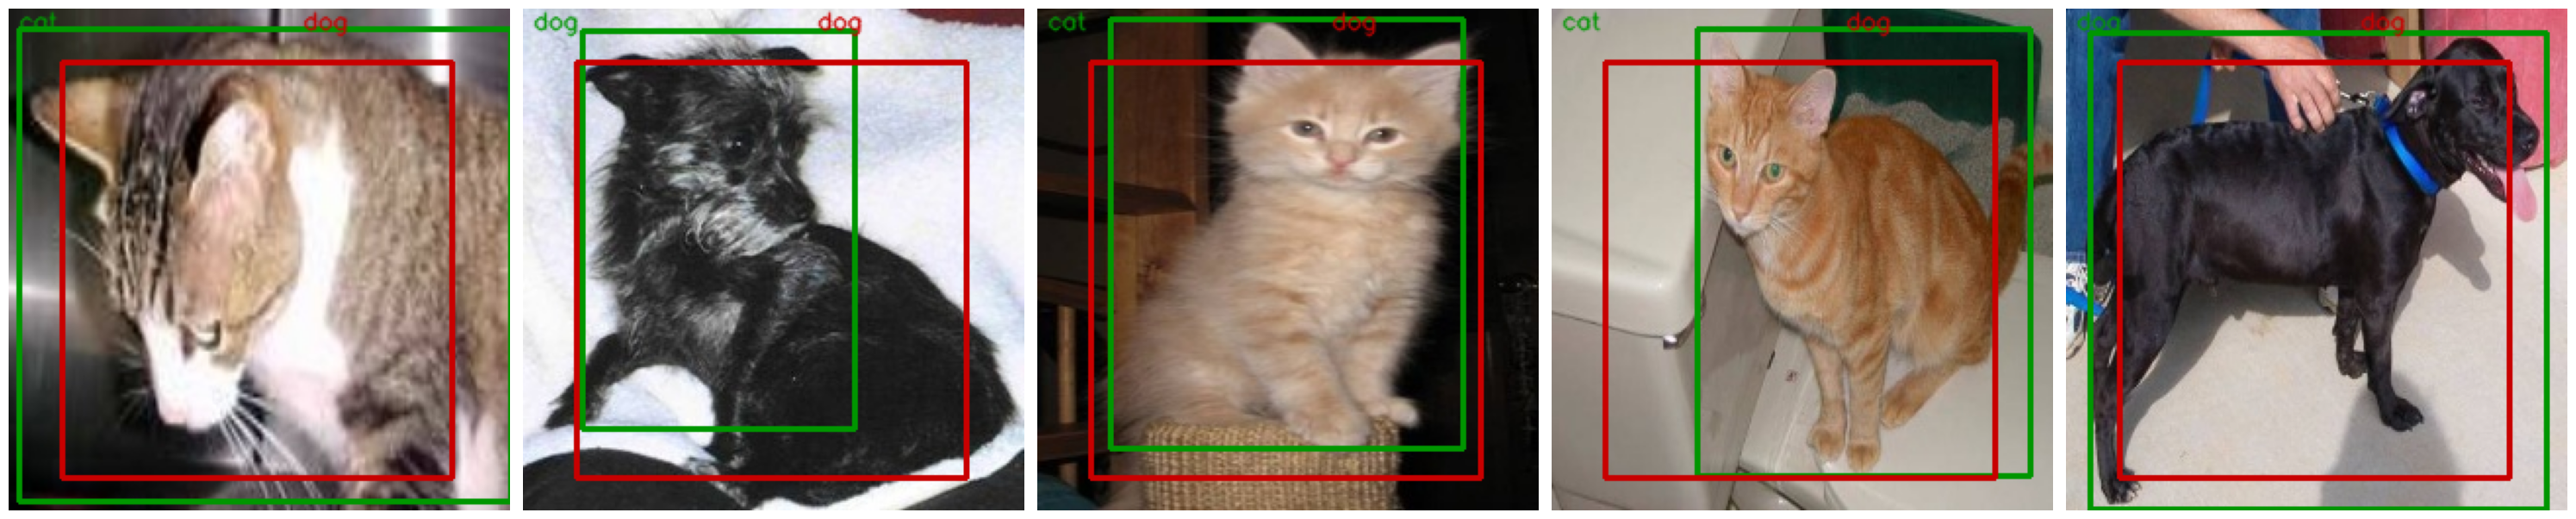

In [ ]:
# Green: ground truth
imgs = draw_predictions(imgs, classes, bboxes, [(0, 150, 0)], (5, 10))
# Red: predicted
pred_classes_ = []
for i in range(num_imgs):
    temp = np.array([pred_classes[i]])
    pred_classes_.append(temp)
imgs = draw_predictions(imgs, pred_classes_, pred_bboxes, [(200, 0, 0)], (150, 10))

fig, axes = plt.subplots(nrows=nrows, ncols=num_imgs // nrows, figsize=(30, 30))

for i, ax in enumerate(axes.flat):
    ax.imshow(imgs[i])
    ax.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
!wget https://upload.wikimedia.org/wikipedia/commons/d/dc/Canis_lupus_familiaris_Perro_Mestizo.JPG
!ls

--2023-10-31 00:03:06--  https://upload.wikimedia.org/wikipedia/commons/d/dc/Canis_lupus_familiaris_Perro_Mestizo.JPG
Resolving upload.wikimedia.org (upload.wikimedia.org)... 208.80.154.240, 2620:0:861:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|208.80.154.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3089435 (2.9M) [image/jpeg]
Saving to: ‘Canis_lupus_familiaris_Perro_Mestizo.JPG’

Canis_lupus_familia 100%[===================>]   2.95M  --.-KB/s    in 0.1s    

2023-10-31 00:03:06 (20.6 MB/s) - ‘Canis_lupus_familiaris_Perro_Mestizo.JPG’ saved [3089435/3089435]

'800px-Gioconda_(copia_del_Museo_del_Prado_restaurada).jpg'
 Canis_lupus_familiaris_Perro_Mestizo.JPG
 __notebook__.ipynb


In [ ]:
pickle_rick_img = cv2.imread('Canis_lupus_familiaris_Perro_Mestizo.JPG')
pickle_rick_img = cv2.resize(pickle_rick_img, (h, w))
pickle_rick_img_=np.expand_dims(pickle_rick_img.transpose(2,0,1), 0)

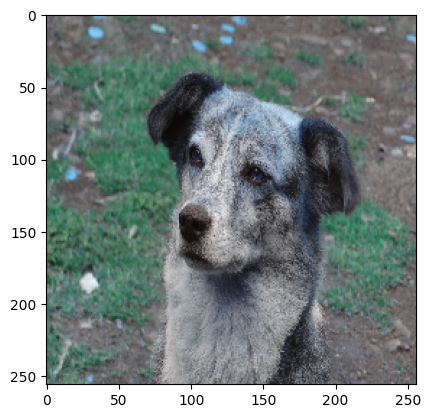

In [ ]:
plt.imshow(pickle_rick_img)

In [ ]:
pickle_rick_img.shape, pickle_rick_img_.shape

((256, 256, 3), (1, 3, 256, 256))

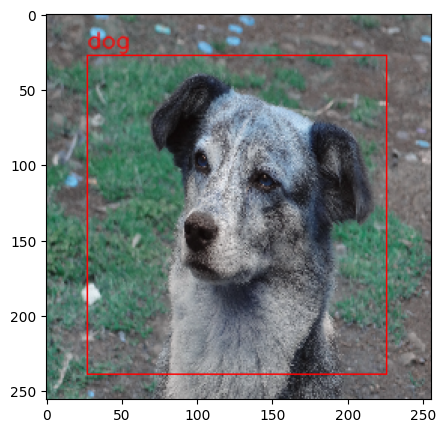

In [ ]:
preds = model(torch.tensor(pickle_rick_img_).float().to(device))
pred_classes = preds['class_id'].argmax(-1).detach().cpu().numpy()
pred_bboxes = preds['bbox'].detach().cpu().numpy().tolist()
pred_class = id2obj[pred_classes[0]]
xmin=int(pred_bboxes[0][0]*h)
ymin=int(pred_bboxes[0][1]*h)
xmax=int(pred_bboxes[0][2]*h)
ymax=int(pred_bboxes[0][3]*h)
pickle_rick_img = cv2.rectangle(pickle_rick_img, (xmin, ymin), (xmax, ymax), (255, 0, 0))
pickle_rick_img = cv2.putText(pickle_rick_img, pred_class, (xmin, ymin-5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 1, cv2.LINE_AA)
plt.figure(figsize=(5, 5))
plt.imshow(pickle_rick_img)
#plt.axis("off")
plt.show()

In [ ]:
xmin

27

In [ ]:
# Save the model to disk
torch.save(model, 'pretrained_model.pth')

In [92]:
test

,filename,class,class_id
1,frame_0926.jpg,PET,1
4,frame_0928.jpg,PET,1
13,frame_0923.jpg,PET,1
14,frame_0922.jpg,PET,1
20,frame_0884.jpg,PET,1
...,...,...,...
939,frame_5550.jpg,EMPTY,0
943,frame_5367.jpg,EMPTY,0
945,frame_5361.jpg,EMPTY,0
955,frame_5444.jpg,EMPTY,0


# Submission

In [93]:
# Perform inference on cpu in order to avoid memory problems
device = 'cuda'
model = model.to(device)

test_root_dir ='/content/drive/MyDrive/ecobot nuevo/PrimerDATASET ecobot-20231117T022901Z-001/PrimerDATASET ecobot/total'
test_df =test
test_ds = PetsDataset(test_df, root_dir=test_root_dir, labeled=False, transform=eval_transforms)
test_data = DataLoader(test_ds, batch_size=1, num_workers=cpu_count(), shuffle=False)

class_preds = []
bbox_preds = []

for batch in test_data:
    batch_preds = model(batch['image'].float().to(device))

    class_pred = batch_preds['class_id'].argmax(-1).detach().cpu().numpy()


    class_preds.append(class_pred.squeeze())


In [94]:
class_preds = np.array(class_preds)


In [95]:
class_preds

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [96]:
submission = pd.DataFrame(
    index=test_df.filename,
    data={
        'class': class_preds,
        # Descomentar esta línea cuando generen el archivo de submissions final,
        # para incluir las predicciones de su modelo para regresión
        #'bbox': bbox_preds
    }
)
submission

,class
filename,
frame_0926.jpg,1
frame_0928.jpg,1
frame_0923.jpg,1
frame_0922.jpg,1
frame_0884.jpg,1
...,...
frame_5550.jpg,1
frame_5367.jpg,1
frame_5361.jpg,1


In [99]:
test.class_id.value_counts()

1    103
0     90
Name: class_id, dtype: int64

In [104]:
submission["class"].value_counts()

1    193
Name: class, dtype: int64

In [ ]:
submission['class']=submission['class'].replace(id2obj)

In [ ]:
submission.to_csv('submission.csv')

In [ ]:
submission["x_min"] = bbox_preds[:, 0]*h
submission["y_min"] = bbox_preds[:, 1]*h
submission["x_max"] = bbox_preds[:, 2]*h
submission["y_max"] = bbox_preds[:, 3]*h

In [ ]:
submission.to_csv('submissionentrega_profe.csv')

In [ ]:
submission['class'].value_counts()

class
dog    192
Name: count, dtype: int64

In [ ]:
submission

,class,x_min,y_min,x_max,y_max
filename,,,,,
image.3401.jpg,dog,27.896582,27.901342,226.645905,239.255554
image.3325.jpg,dog,27.896582,27.901342,226.645905,239.255554
image.3242.jpg,dog,27.896582,27.901342,226.645905,239.255554
image.3218.jpg,dog,27.896582,27.901342,226.645905,239.255554
image.797.jpg,dog,27.896582,27.901342,226.645905,239.255554
...,...,...,...,...,...
image.839.jpg,dog,27.896582,27.901342,226.645905,239.255554
image.892.jpg,dog,27.896582,27.901342,226.645905,239.255554
image.689.jpg,dog,27.896582,27.901342,226.645905,239.255554


In [ ]:
submission.to_csv('submission.csv')